In [1]:
# Import necessary dependencies for data analysis and visualization
import numpy as np
import pandas as pd
import os
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from scipy.stats import linregress 

In [2]:
# Read the CSV file 'us_disaster.csv' into a Pandas DataFrame called data_df
data_df = pd.read_csv('./Resources/us_disaster.csv')
# Display the first few rows of the DataFrame to get an overview of the data
data_df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fy_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,incident_end_date,disaster_closeout_date,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id
0,DR-1-GA,1,GA,DR,1953-05-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-05-02T00:00:00Z,1954-06-01T00:00:00Z,13000,0,Statewide,53013,NaN,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a
1,DR-2-TX,2,TX,DR,1953-05-15T00:00:00Z,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,1953-05-15T00:00:00Z,1958-01-01T00:00:00Z,48000,0,Statewide,53003,NaN,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6
2,DR-3-LA,3,LA,DR,1953-05-29T00:00:00Z,1953,Flood,Flood,0,1,...,1953-05-29T00:00:00Z,1960-02-01T00:00:00Z,22000,0,Statewide,53005,NaN,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0
3,DR-4-MI,4,MI,DR,1953-06-02T00:00:00Z,1953,Tornado,Tornado,0,1,...,1953-06-02T00:00:00Z,1956-02-01T00:00:00Z,26000,0,Statewide,53004,NaN,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6
4,DR-5-MT,5,MT,DR,1953-06-06T00:00:00Z,1953,Flood,Floods,0,1,...,1953-06-06T00:00:00Z,1955-12-01T00:00:00Z,30000,0,Statewide,53006,NaN,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61


In [3]:
# Display the column names of the DataFrame
data_df.columns

Index(['fema_declaration_string', 'disaster_number', 'state',
       'declaration_type', 'declaration_date', 'fy_declared', 'incident_type',
       'declaration_title', 'ih_program_declared', 'ia_program_declared',
       'pa_program_declared', 'hm_program_declared', 'incident_begin_date',
       'incident_end_date', 'disaster_closeout_date', 'fips', 'place_code',
       'designated_area', 'declaration_request_number', 'last_ia_filing_date',
       'last_refresh', 'hash', 'id'],
      dtype='object')

In [4]:
# Display the basic information about the DataFrame, including data types and non-null counts
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64092 entries, 0 to 64091
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     64092 non-null  object
 1   disaster_number             64092 non-null  int64 
 2   state                       64092 non-null  object
 3   declaration_type            64092 non-null  object
 4   declaration_date            64092 non-null  object
 5   fy_declared                 64092 non-null  int64 
 6   incident_type               64092 non-null  object
 7   declaration_title           64092 non-null  object
 8   ih_program_declared         64092 non-null  int64 
 9   ia_program_declared         64092 non-null  int64 
 10  pa_program_declared         64092 non-null  int64 
 11  hm_program_declared         64092 non-null  int64 
 12  incident_begin_date         64092 non-null  object
 13  incident_end_date           55682 non-null  ob

In [5]:
# Create a copy of the original DataFrame for data manipulation
converted_data_df = data_df.copy()

# Convert specific datetime columns to pandas Timestamps for better time handling
converted_data_df["declaration_date"] = pd.to_datetime(converted_data_df["declaration_date"])
converted_data_df["incident_begin_date"] = pd.to_datetime(converted_data_df["incident_begin_date"])
converted_data_df["incident_end_date"] = pd.to_datetime(converted_data_df["incident_end_date"])
converted_data_df["disaster_closeout_date"] = pd.to_datetime(converted_data_df["disaster_closeout_date"])
converted_data_df["last_ia_filing_date"] = pd.to_datetime(converted_data_df["last_ia_filing_date"], errors='coerce')

# Clean data by removing rows with missing values in the 'disaster_closeout_date' column
converted_data_df = converted_data_df.dropna(subset=["disaster_closeout_date"])

# Calculate the financial response time in months for each incident and add it as a new column
converted_data_df["Financial Response Time (months)"] = ((converted_data_df["disaster_closeout_date"] - converted_data_df["declaration_date"]) / pd.Timedelta(days=30.44)).astype(int)

# Drop rows where 'disaster_closeout_date' is earlier than 'declaration_date'
converted_data_df = converted_data_df[converted_data_df["Financial Response Time (months)"] >= 0]

In [6]:
# Calculate the time difference in hours between 'incident_begin_date' and 'incident_end_date'
# converted_data_df["Incident Begin/End (hours)"] = (converted_data_df["incident_end_date"] - converted_data_df["incident_begin_date"]).dt.total_seconds() / 3600

converted_data_df["Incident Begin/End (days)"] = (converted_data_df["incident_end_date"] - converted_data_df["incident_begin_date"]).dt.days

In [7]:
converted_data_df.columns

Index(['fema_declaration_string', 'disaster_number', 'state',
       'declaration_type', 'declaration_date', 'fy_declared', 'incident_type',
       'declaration_title', 'ih_program_declared', 'ia_program_declared',
       'pa_program_declared', 'hm_program_declared', 'incident_begin_date',
       'incident_end_date', 'disaster_closeout_date', 'fips', 'place_code',
       'designated_area', 'declaration_request_number', 'last_ia_filing_date',
       'last_refresh', 'hash', 'id', 'Financial Response Time (months)',
       'Incident Begin/End (days)'],
      dtype='object')

In [8]:
converted_data_df = converted_data_df.rename(columns={"fy_declared": "fiscal_year_declared"})


In [9]:
converted_data_df.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fiscal_year_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id,Financial Response Time (months),Incident Begin/End (days)
0,DR-1-GA,1,GA,DR,1953-05-02 00:00:00+00:00,1953,Tornado,Tornado,0,1,...,13000,0,Statewide,53013,NaT,2023-03-18T13:22:03Z,48af1afcc4535aa910ddb5b85eebe047dc703a6b,da5c8f17-c28f-4c41-8e06-fa8efc85aa4a,12,0.0
1,DR-2-TX,2,TX,DR,1953-05-15 00:00:00+00:00,1953,Tornado,Tornado & Heavy Rainfall,0,1,...,48000,0,Statewide,53003,NaT,2023-03-18T13:22:03Z,6bbba411d294ec521683e36313c8da2992e8a857,b0b41f55-0d77-43ac-898c-3cc4a18231e6,55,0.0
2,DR-3-LA,3,LA,DR,1953-05-29 00:00:00+00:00,1953,Flood,Flood,0,1,...,22000,0,Statewide,53005,NaT,2023-03-18T13:22:03Z,5b2fa18b404bdcf0d3038cd17f1aa995d5412f48,9fd9401d-c76c-43c3-b42a-6a4ae5139ec0,80,0.0
3,DR-4-MI,4,MI,DR,1953-06-02 00:00:00+00:00,1953,Tornado,Tornado,0,1,...,26000,0,Statewide,53004,NaT,2023-03-18T13:22:03Z,403164346eb22263810402e8b67f1712f1574ad5,67324f38-1f00-4bbc-aeda-5194d1befad6,31,0.0
4,DR-5-MT,5,MT,DR,1953-06-06 00:00:00+00:00,1953,Flood,Floods,0,1,...,30000,0,Statewide,53006,NaT,2023-03-18T13:22:03Z,8c775d2ce843a8eba2417f9716ba5c75fe0e53f3,e3853916-c7a2-4557-ad8e-60a42d369a61,29,0.0


In [10]:
# Sort the DataFrame by 'Financial Response Time (months)' in ascending order
sorted_df = converted_data_df.sort_values(by='Financial Response Time (months)', ascending=True)

# Filter out rows where 'Financial Response Time (months)' is not equal to 0
results_df = sorted_df[sorted_df['Financial Response Time (months)'] != 0]

results_df.tail()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fiscal_year_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id,Financial Response Time (months),Incident Begin/End (days)
8807,DR-792-NY,792,NY,DR,1987-05-15 00:00:00+00:00,1987,Flood,Flooding,0,1,...,36095,99095,Schoharie (County),87009,NaT,2023-03-18T13:22:03Z,7569608a5866b587dffbd56e5f602cff9eaabebe,0bafb6c4-8553-4a1b-b217-da9778505994,292,4.0
8806,DR-792-NY,792,NY,DR,1987-05-15 00:00:00+00:00,1987,Flood,Flooding,0,1,...,36057,99057,Montgomery (County),87009,NaT,2023-03-18T13:22:03Z,ede883d37d59c978bb26f72e0ca7a1b7d5d67a50,ac28dcff-91aa-411e-9c2a-6529086ee718,292,4.0
8805,DR-792-NY,792,NY,DR,1987-05-15 00:00:00+00:00,1987,Flood,Flooding,0,1,...,36039,99039,Greene (County),87009,NaT,2023-03-18T13:22:03Z,d69c981f4bdaf15bcdaaf11061f0b9de27aab71e,a505fe6e-6231-41eb-9065-b09adad63f34,292,4.0
8804,DR-792-NY,792,NY,DR,1987-05-15 00:00:00+00:00,1987,Flood,Flooding,0,1,...,36025,99025,Delaware (County),87009,NaT,2023-03-18T13:22:03Z,0f8cfe42b89739b8419d0a3e77b6812cd1fdf7d0,2aaac453-a85c-475c-a5ad-6d11a1c9a7df,292,4.0
6721,EM-3066-NY,3066,NY,EM,1978-08-07 00:00:00+00:00,1978,Toxic Substances,"Chemical Waste, Love Canal",0,0,...,36083,99083,Rensselaer (County),78084,NaT,2023-03-18T13:22:03Z,683bedaa5498b54b93205d4b246779e79fbe9865,78895cd6-e675-4236-a968-6f397c884fb9,397,0.0


In [11]:
# Get the unique incident types from the original DataFrame
unique_disasters = data_df['incident_type'].unique()
unique_disasters

array(['Tornado', 'Flood', 'Fire', 'Other', 'Earthquake', 'Hurricane',
       'Volcanic Eruption', 'Severe Storm', 'Toxic Substances', 'Typhoon',
       'Drought', 'Dam/Levee Break', 'Snowstorm', 'Severe Ice Storm',
       'Freezing', 'Coastal Storm', 'Fishing Losses', 'Mud/Landslide',
       'Human Cause', 'Terrorist', 'Tsunami', 'Chemical', 'Biological',
       'Tropical Storm', 'Winter Storm'], dtype=object)

In [12]:
# Display the unique incident types for further analysi
print(converted_data_df['incident_type'].unique())

# Filter out rows with negative financial response times
negative_response_times = converted_data_df[converted_data_df['Financial Response Time (months)'] < 0]
print(negative_response_times)

['Tornado' 'Flood' 'Fire' 'Other' 'Earthquake' 'Hurricane'
 'Volcanic Eruption' 'Severe Storm' 'Toxic Substances' 'Typhoon' 'Drought'
 'Dam/Levee Break' 'Snowstorm' 'Severe Ice Storm' 'Freezing'
 'Coastal Storm' 'Fishing Losses' 'Mud/Landslide' 'Human Cause'
 'Terrorist' 'Tsunami' 'Chemical' 'Biological' 'Tropical Storm']
Empty DataFrame
Columns: [fema_declaration_string, disaster_number, state, declaration_type, declaration_date, fiscal_year_declared, incident_type, declaration_title, ih_program_declared, ia_program_declared, pa_program_declared, hm_program_declared, incident_begin_date, incident_end_date, disaster_closeout_date, fips, place_code, designated_area, declaration_request_number, last_ia_filing_date, last_refresh, hash, id, Financial Response Time (months), Incident Begin/End (days)]
Index: []

[0 rows x 25 columns]


In [13]:
# Get the shape (number of rows and columns) of the results DataFrame
results_df.shape

(48779, 25)

In [14]:
# Define a function to plot a boxplot for a specific feature in the DataFrame
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

## The y-axis of this boxplot represents the "Financial Response Time" in months for different disaster incidents. The boxplot summarizes the distribution of financial response times in the DataFrame

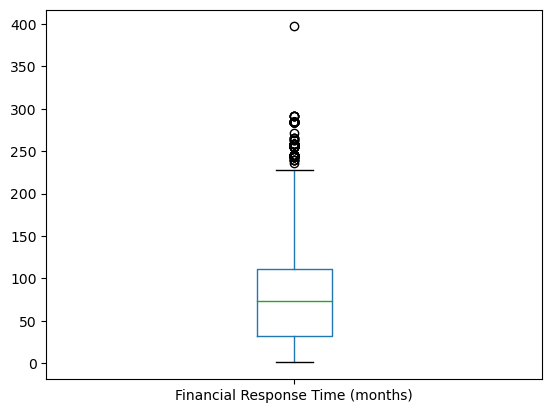

In [15]:
# Plot the boxplot for 'Financial Response Time (months)'
plot_boxplot(results_df, "Financial Response Time (months)")

## The y-axis of this boxplot represents the years (fiscal years) in which the disaster incidents were declared. The boxplot summarizes the distribution of fiscal years in the DataFrame

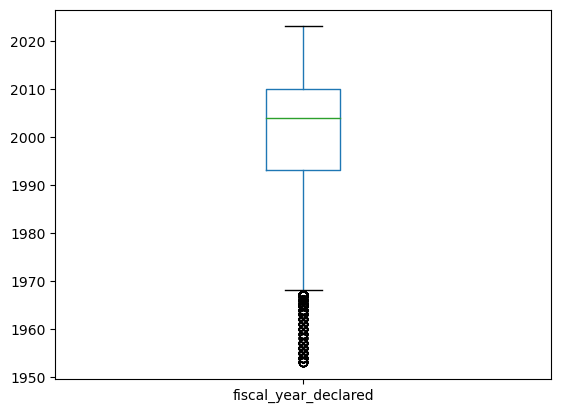

In [16]:
# Plot the boxplot for 'fy_year_declared'
plot_boxplot(results_df, 'fiscal_year_declared')

In [17]:
# Define a function called "outliers" which returns a list of index of outliers
# IQR = Q3-Q1
# +/- 1.5*IQR

def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find the index of rows that have values outside the lower and upper bounds
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
                    
    return ls

In [18]:
# Create an empty list to store the output indices from multiple rows
index_list = []
for feature in ['Financial Response Time (months)', 'fiscal_year_declared']:
    index_list.extend(outliers(results_df, feature))

In [19]:
# Remove hashtag to see index list of outliers
#index_list

In [20]:
# Define a function to remove rows with outliers based on their indices
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [21]:
# Remove rows with outliers based on the index_list
df_cleaned = remove(results_df, index_list)
# Get the new shape (number of rows and columns) of the cleaned DataFrame
df_cleaned.shape

(47604, 25)

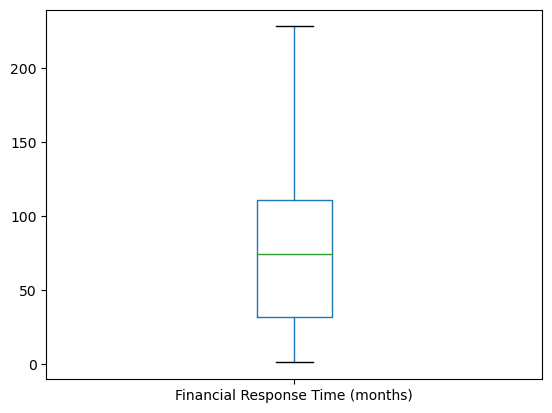

In [22]:
# Plot the boxplot for 'Financial Response Time (months)' in the cleaned DataFrame
plot_boxplot(df_cleaned, 'Financial Response Time (months)')

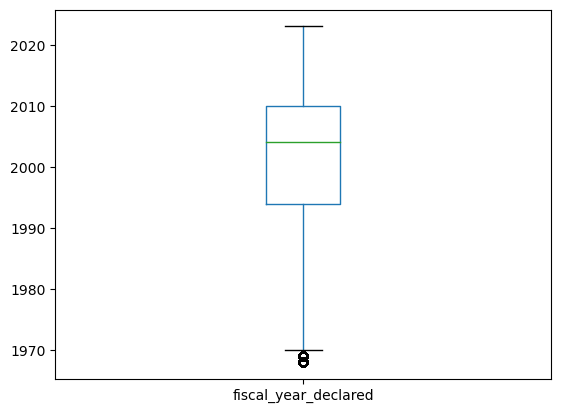

In [23]:
# Plot the boxplot for 'fiscal_year_declared' in the cleaned DataFrame
plot_boxplot(df_cleaned, 'fiscal_year_declared')

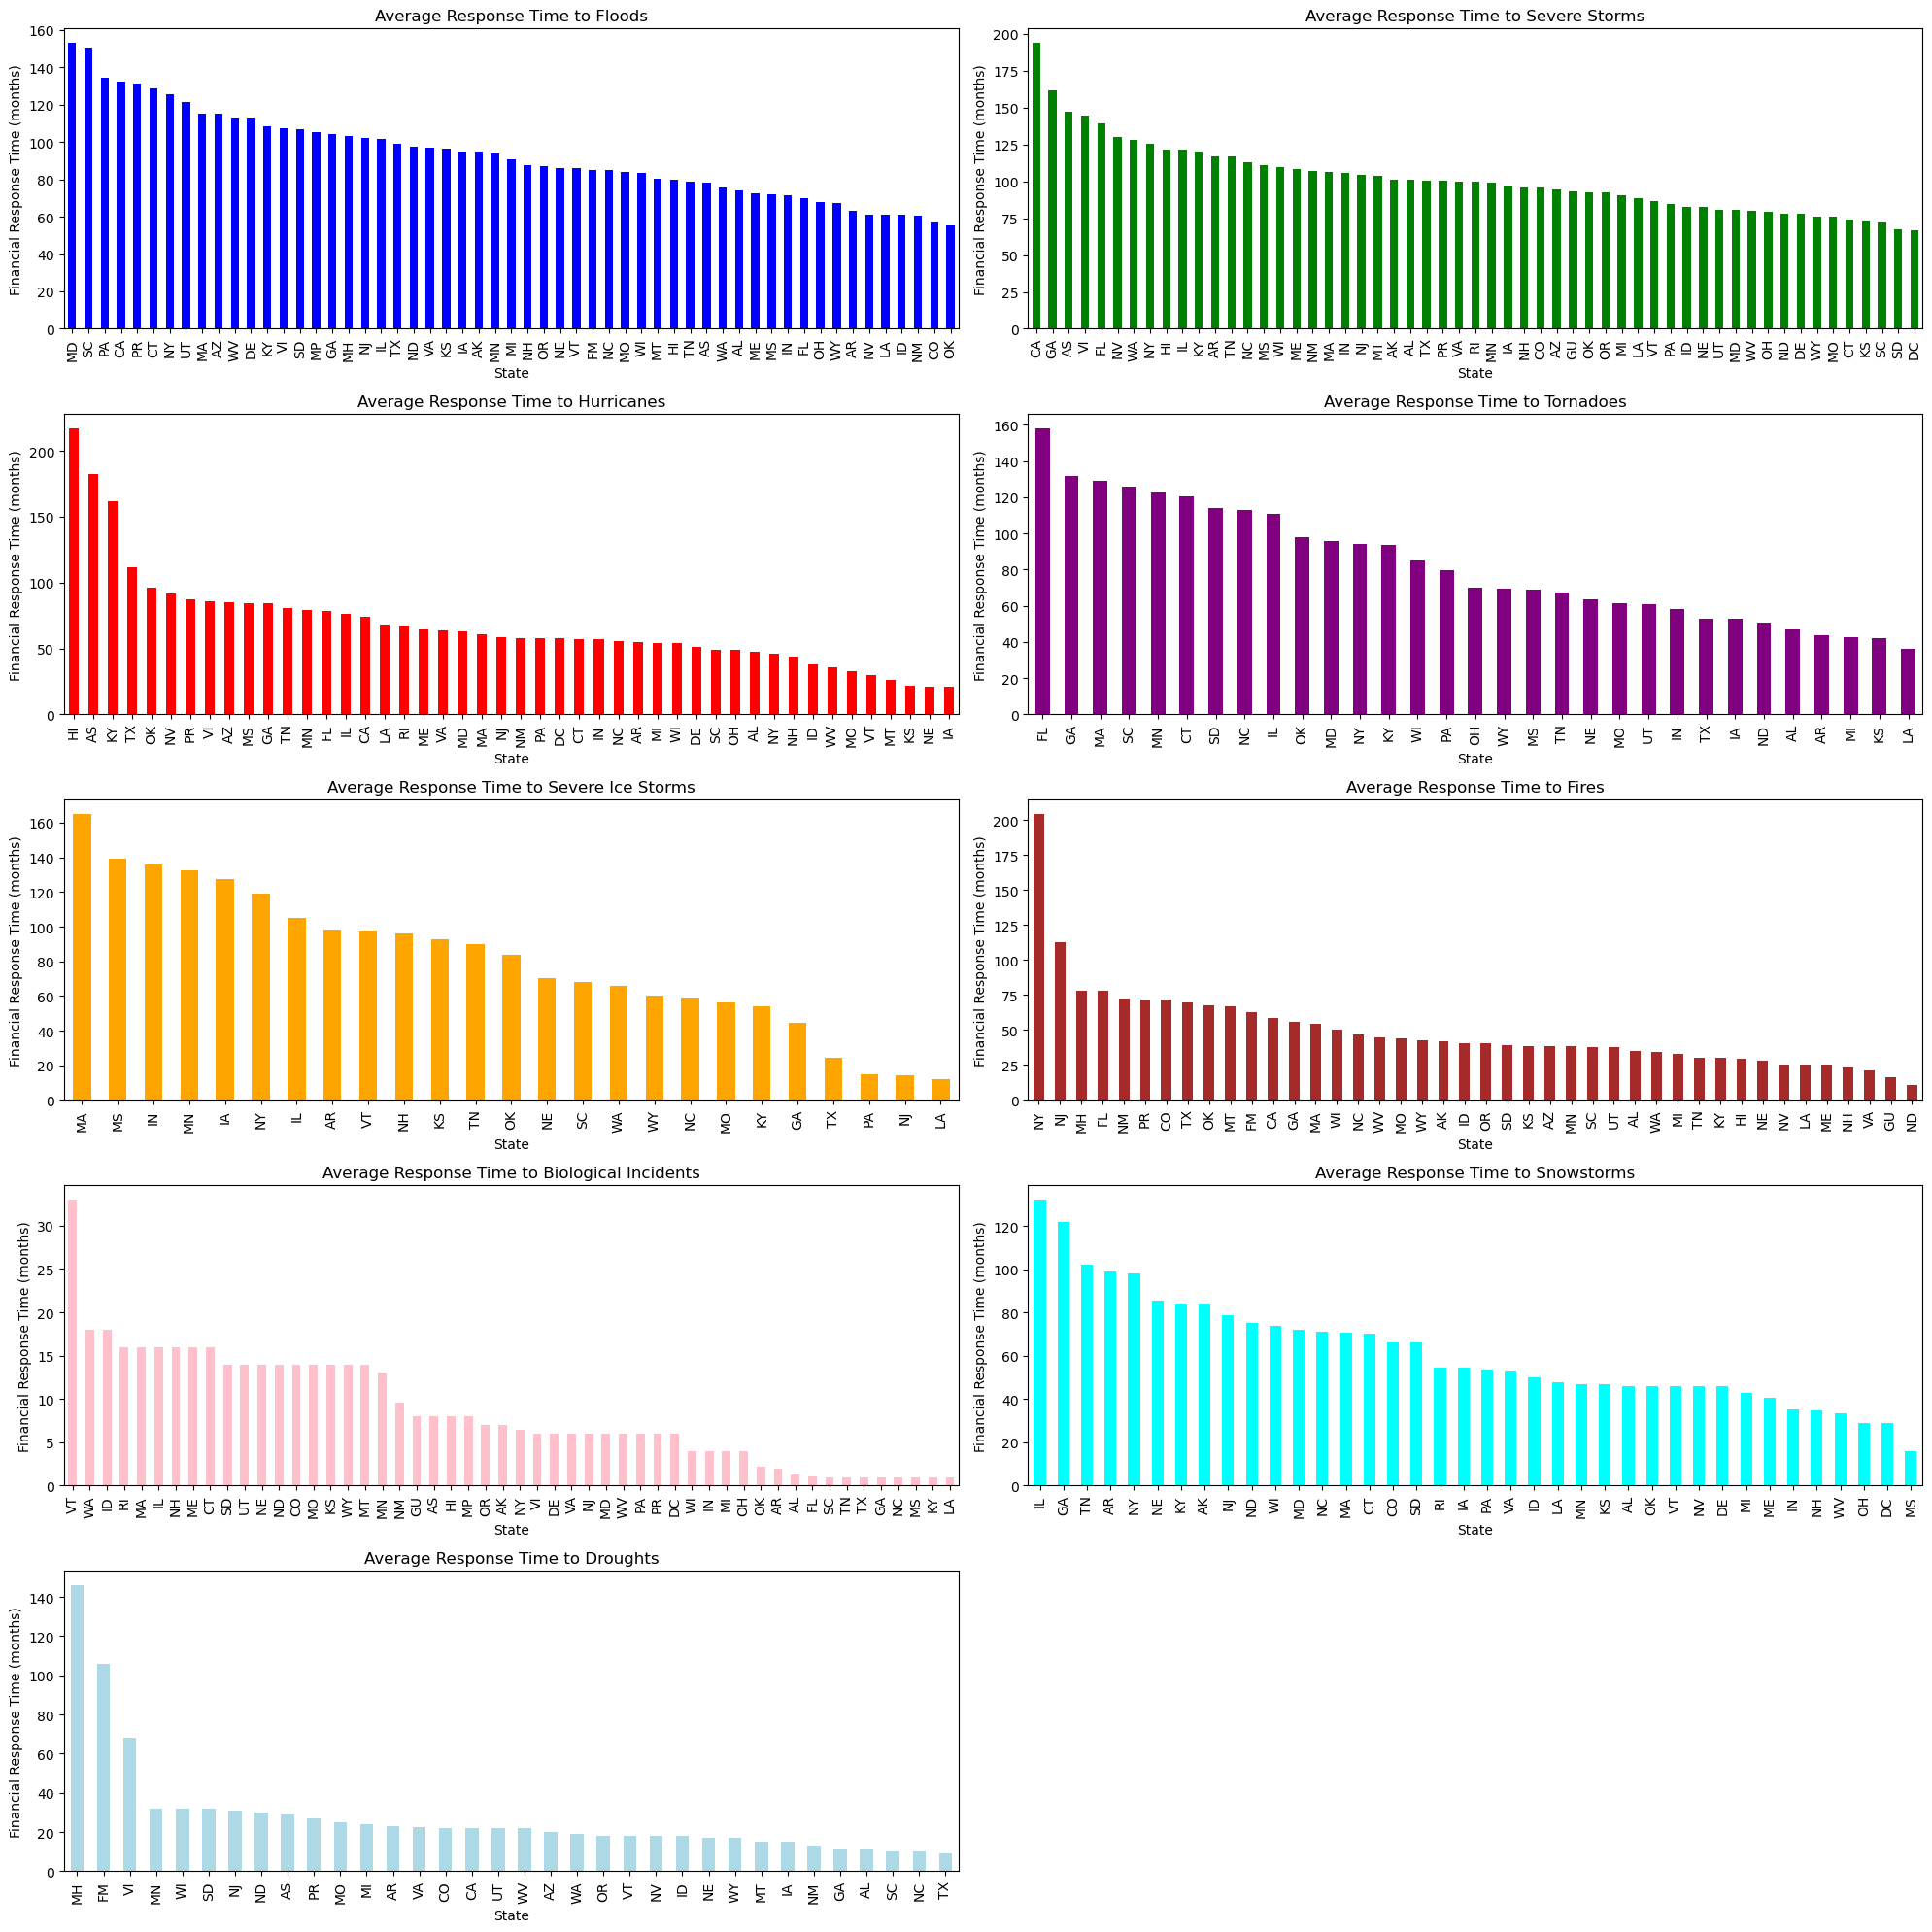

In [24]:
# Filter the data for each incident type
flood_data = df_cleaned[df_cleaned['incident_type'] == 'Flood']
severe_storm_data = df_cleaned[df_cleaned['incident_type'] == 'Severe Storm']
hurricane_data = df_cleaned[df_cleaned['incident_type'] == 'Hurricane']
tornado_data = df_cleaned[df_cleaned['incident_type'] == 'Tornado']
severe_ice_storm_data = df_cleaned[df_cleaned['incident_type'] == 'Severe Ice Storm']
fire_data = df_cleaned[df_cleaned['incident_type'] == 'Fire']
biological_data = df_cleaned[df_cleaned['incident_type'] == 'Biological']
snowstorm_data = df_cleaned[df_cleaned['incident_type'] == 'Snowstorm']
drought_data = df_cleaned[df_cleaned['incident_type'] == 'Drought']
coastal_storm_data = df_cleaned[df_cleaned['incident_type'] == 'Coastal Storm']


# Calculate the average response time for each state and incident type and sort in descending order
flood_avg_response = flood_data.groupby('state')['Financial Response Time (months)'].mean().sort_values(ascending=False)
severe_storm_avg_response = severe_storm_data.groupby('state')['Financial Response Time (months)'].mean().sort_values(ascending=False)
hurricane_avg_response = hurricane_data.groupby('state')['Financial Response Time (months)'].mean().sort_values(ascending=False)
tornado_avg_response = tornado_data.groupby('state')['Financial Response Time (months)'].mean().sort_values(ascending=False)
severe_ice_storm_avg_response = severe_ice_storm_data.groupby('state')['Financial Response Time (months)'].mean().sort_values(ascending=False)
fire_avg_response = fire_data.groupby('state')['Financial Response Time (months)'].mean().sort_values(ascending=False)
biological_avg_response = biological_data.groupby('state')['Financial Response Time (months)'].mean().sort_values(ascending=False)
snowstorm_avg_response = snowstorm_data.groupby('state')['Financial Response Time (months)'].mean().sort_values(ascending=False)
drought_avg_response = drought_data.groupby('state')['Financial Response Time (months)'].mean().sort_values(ascending=False)


# Create bar plots for each incident type
plt.figure(figsize=(20, 20))

plt.subplot(5, 2, 1)
flood_avg_response.plot(kind='bar', color='blue')
plt.title('Average Response Time to Floods')
plt.xlabel('State')
plt.ylabel('Financial Response Time (months)')

# If the severe storm data is not empty, create a bar plot
if not severe_storm_data.empty:
    plt.subplot(5, 2, 2)
    severe_storm_avg_response.plot(kind='bar', color='green')
    plt.title('Average Response Time to Severe Storms')
    plt.xlabel('State')
    plt.ylabel('Financial Response Time (months)')

plt.subplot(5, 2, 3)
hurricane_avg_response.plot(kind='bar', color='red')
plt.title('Average Response Time to Hurricanes')
plt.xlabel('State')
plt.ylabel('Financial Response Time (months)')

plt.subplot(5, 2, 4)
tornado_avg_response.plot(kind='bar', color='purple')
plt.title('Average Response Time to Tornadoes')
plt.xlabel('State')
plt.ylabel('Financial Response Time (months)')

plt.subplot(5, 2, 5)
severe_ice_storm_avg_response.plot(kind='bar', color='orange')
plt.title('Average Response Time to Severe Ice Storms')
plt.xlabel('State')
plt.ylabel('Financial Response Time (months)')

plt.subplot(5, 2, 6)
fire_avg_response.plot(kind='bar', color='brown')
plt.title('Average Response Time to Fires')
plt.xlabel('State')
plt.ylabel('Financial Response Time (months)')

plt.subplot(5, 2, 7)
biological_avg_response.plot(kind='bar', color='pink')
plt.title('Average Response Time to Biological Incidents')
plt.xlabel('State')
plt.ylabel('Financial Response Time (months)')

plt.subplot(5, 2, 8)
snowstorm_avg_response.plot(kind='bar', color='cyan')
plt.title('Average Response Time to Snowstorms')
plt.xlabel('State')
plt.ylabel('Financial Response Time (months)')

plt.subplot(5, 2, 9)
drought_avg_response.plot(kind='bar', color='lightblue')
plt.title('Average Response Time to Droughts')
plt.xlabel('State')
plt.ylabel('Financial Response Time (months)')

plt.tight_layout()
plt.show()

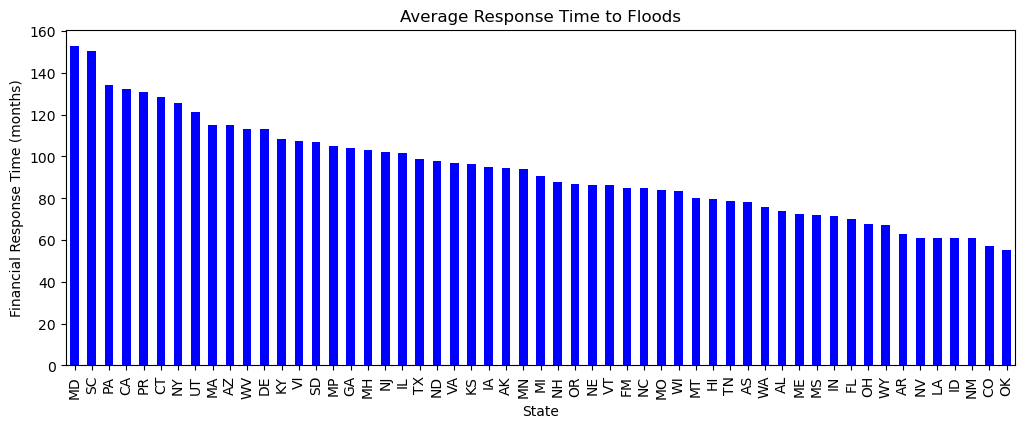

In [25]:
# Create bar plots for each incident type
plt.figure(figsize=(20, 20))

plt.subplot(5, 2, 1)
flood_avg_response.plot(kind='bar', color='blue')
plt.title('Average Response Time to Floods')
plt.xlabel('State')
plt.ylabel('Financial Response Time (months)')

plt.tight_layout()
plt.show()

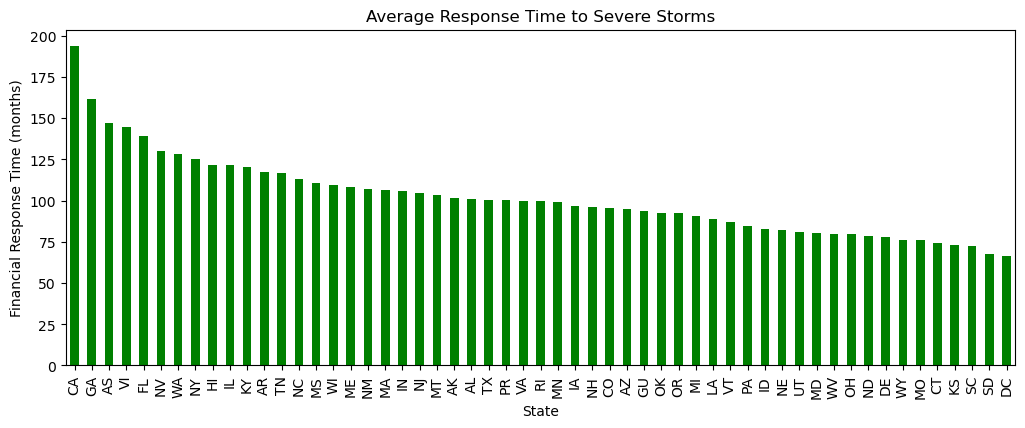

In [26]:
# Create bar plots for each incident type
plt.figure(figsize=(20, 20))

# If the severe storm data is not empty, create a bar plot
if not severe_storm_data.empty:
    plt.subplot(5, 2, 2)
    severe_storm_avg_response.plot(kind='bar', color='green')
    plt.title('Average Response Time to Severe Storms')
    plt.xlabel('State')
    plt.ylabel('Financial Response Time (months)')

    
plt.tight_layout()
plt.show()

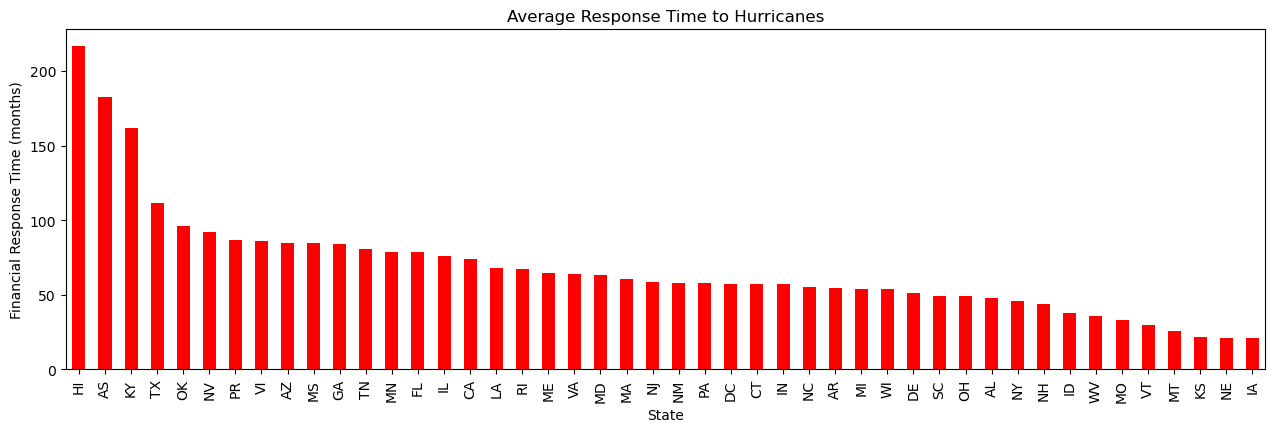

In [27]:
# Create bar plots for each incident type
plt.figure(figsize=(25, 20))

plt.subplot(5, 2, 3)
hurricane_avg_response.plot(kind='bar', color='red')
plt.title('Average Response Time to Hurricanes')
plt.xlabel('State')
plt.ylabel('Financial Response Time (months)')

plt.tight_layout()
plt.show()

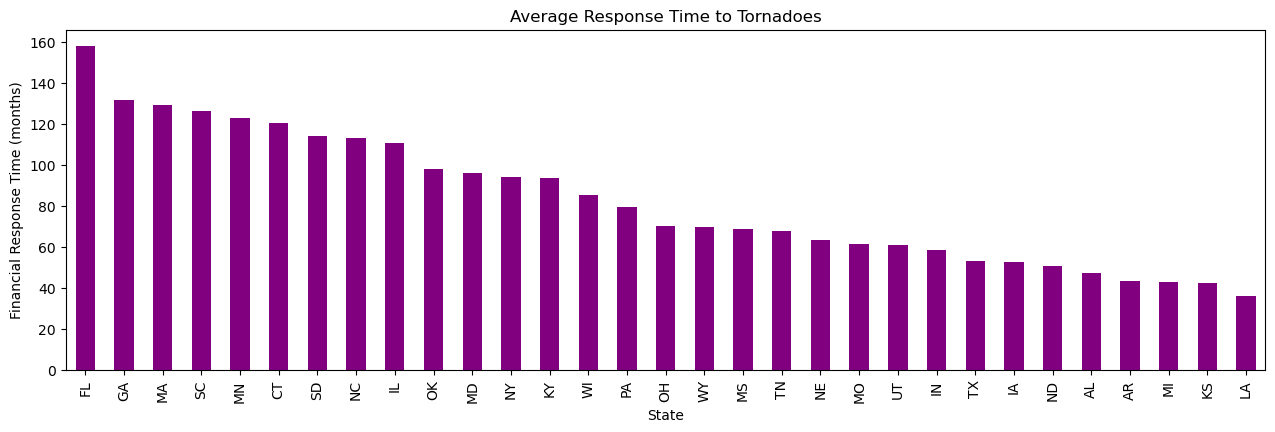

In [28]:
# Create bar plots for each incident type
plt.figure(figsize=(25, 20))

plt.subplot(5, 2, 4)
tornado_avg_response.plot(kind='bar', color='purple')
plt.title('Average Response Time to Tornadoes')
plt.xlabel('State')
plt.ylabel('Financial Response Time (months)')

plt.tight_layout()
plt.show()

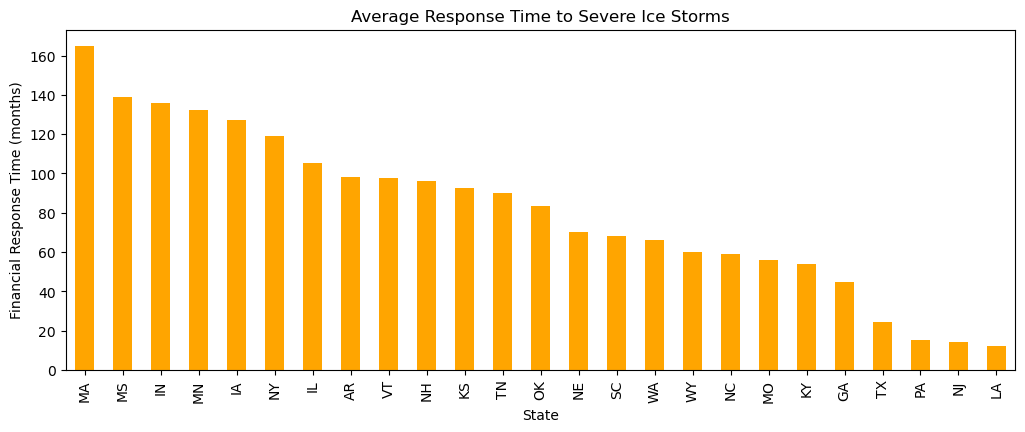

In [29]:
# Create bar plots for each incident type
plt.figure(figsize=(20, 20))

plt.subplot(5, 2, 5)
severe_ice_storm_avg_response.plot(kind='bar', color='orange')
plt.title('Average Response Time to Severe Ice Storms')
plt.xlabel('State')
plt.ylabel('Financial Response Time (months)')

plt.tight_layout()
plt.show()

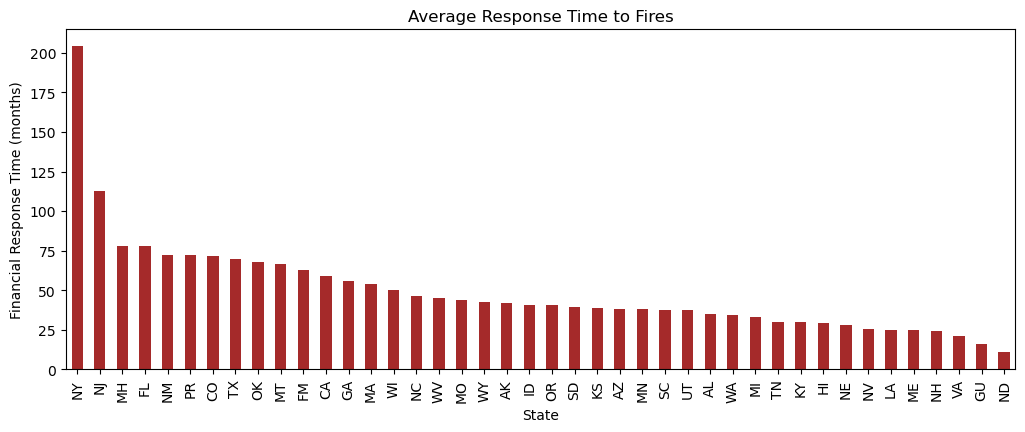

In [30]:
# Create bar plots for each incident type
plt.figure(figsize=(20, 20))

plt.subplot(5, 2, 6)
fire_avg_response.plot(kind='bar', color='brown')
plt.title('Average Response Time to Fires')
plt.xlabel('State')
plt.ylabel('Financial Response Time (months)')

plt.tight_layout()
plt.show()

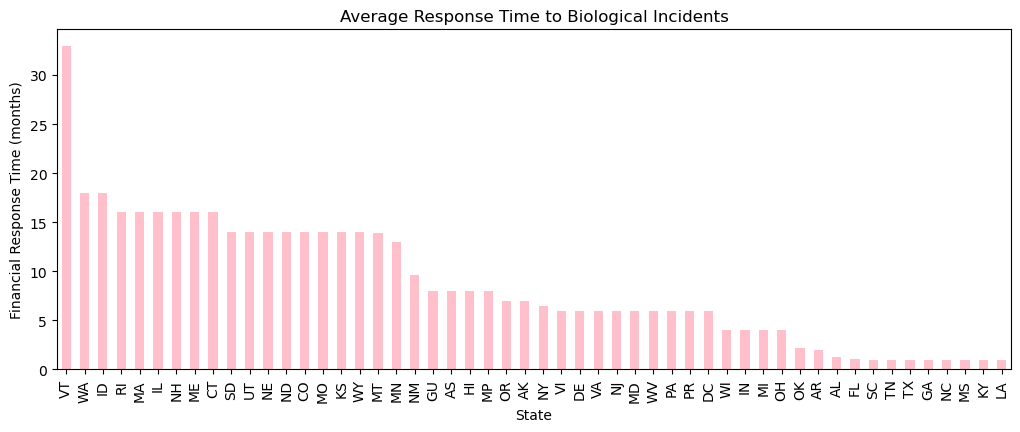

In [31]:
# Create bar plots for each incident type
plt.figure(figsize=(20, 20))

plt.subplot(5, 2, 7)
biological_avg_response.plot(kind='bar', color='pink')
plt.title('Average Response Time to Biological Incidents')
plt.xlabel('State')
plt.ylabel('Financial Response Time (months)')

plt.tight_layout()
plt.show()

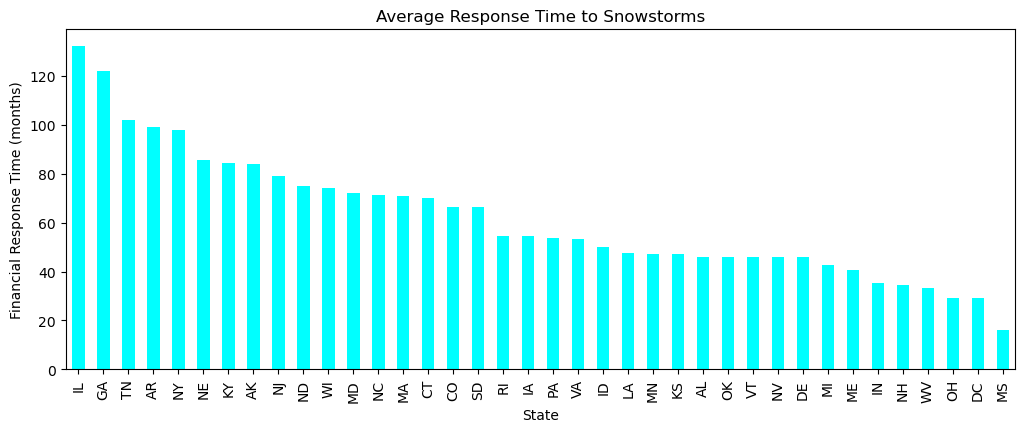

In [32]:
# Create bar plots for each incident type
plt.figure(figsize=(20, 20))

plt.subplot(5, 2, 8)
snowstorm_avg_response.plot(kind='bar', color='cyan')
plt.title('Average Response Time to Snowstorms')
plt.xlabel('State')
plt.ylabel('Financial Response Time (months)')

plt.tight_layout()
plt.show()

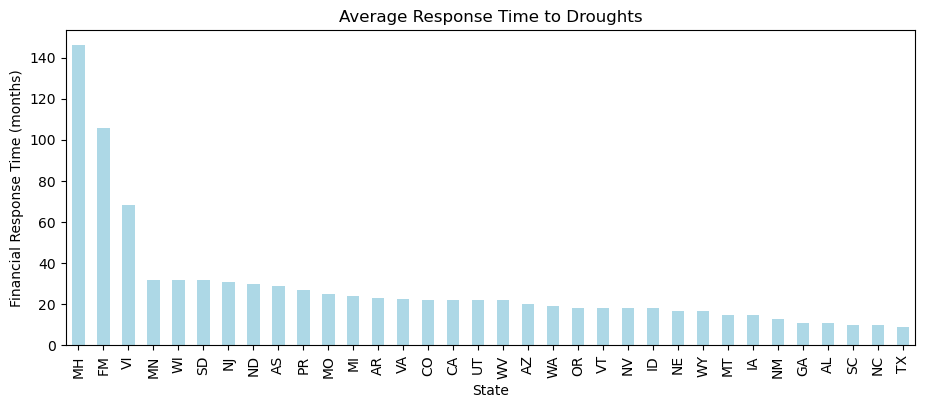

In [33]:
# Create bar plots for each incident type
plt.figure(figsize=(18, 18))

plt.subplot(5, 2, 9)
drought_avg_response.plot(kind='bar', color='lightblue')
plt.title('Average Response Time to Droughts')
plt.xlabel('State')
plt.ylabel('Financial Response Time (months)')

plt.tight_layout()
plt.show()

In [34]:
# Calculate the county counts
county_counts = df_cleaned["designated_area"].value_counts()
county_counts.head(70)

Washington (County)    412
Jefferson (County)     373
Jackson (County)       365
Franklin (County)      359
Lincoln (County)       320
                      ... 
Martin (County)         90
Floyd (County)          89
Richland (County)       87
Dallas (County)         85
Hardin (County)         82
Name: designated_area, Length: 70, dtype: int64

In [35]:
disaster_counts = df_cleaned['incident_type'].value_counts()

# Print out the count of disaster-type instances
for disaster, count in disaster_counts.items():
    print(f"There are {count} occurrences of {disaster}")

There are 13994 occurrences of Severe Storm
There are 9482 occurrences of Hurricane
There are 7976 occurrences of Flood
There are 3486 occurrences of Snowstorm
There are 3407 occurrences of Biological
There are 3058 occurrences of Fire
There are 2193 occurrences of Severe Ice Storm
There are 1238 occurrences of Drought
There are 1221 occurrences of Tornado
There are 566 occurrences of Coastal Storm
There are 300 occurrences of Freezing
There are 289 occurrences of Other
There are 130 occurrences of Earthquake
There are 89 occurrences of Typhoon
There are 48 occurrences of Volcanic Eruption
There are 47 occurrences of Tropical Storm
There are 42 occurrences of Fishing Losses
There are 9 occurrences of Chemical
There are 7 occurrences of Human Cause
There are 5 occurrences of Toxic Substances
There are 5 occurrences of Mud/Landslide
There are 5 occurrences of Terrorist
There are 4 occurrences of Dam/Levee Break
There are 3 occurrences of Tsunami


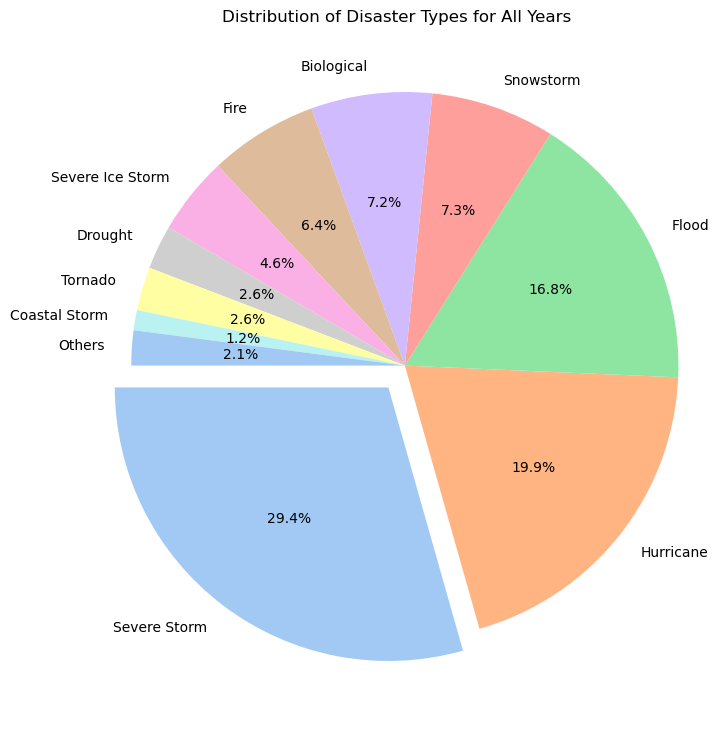

In [36]:
# Calculate the count of each disaster type for all years
disaster_counts_all_years = df_cleaned['incident_type'].value_counts()

# Calculate the total count of disasters for all years
total_disasters_all_years = disaster_counts_all_years.sum()

# Calculate the percentage for each disaster category for all years
percentages_all_years = (disaster_counts_all_years / total_disasters_all_years) * 100

# Get the categories with percentage 1% or below for all years
others_categories_all_years = percentages_all_years[percentages_all_years <= 1]

# Calculate the total count for the "Others" category for all years
others_count_all_years = others_categories_all_years.sum()

# Filter out the categories with percentage above 1% for all years
top_categories_all_years = percentages_all_years[percentages_all_years > 1]

# Add the "Others" category with its count to the filtered counts for all years
others_series_all_years = pd.Series({'Others': others_count_all_years})
disasters_to_display_all_years = pd.concat([top_categories_all_years, others_series_all_years])

# Define the explode values for the pie chart (you can adjust these values as needed)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Create the pie chart with "Others" grouping for all years
plt.figure(figsize=(8, 9))
plt.pie(disasters_to_display_all_years, explode=explode, labels=disasters_to_display_all_years.index, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('pastel'))
plt.title('Distribution of Disaster Types for All Years')
plt.axis('equal')
plt.show()

/var/folders/t1/18wjd24j1v3bs98g33bz6yh40000gn/T/ipykernel_33102/4246774433.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_2019 =df_cleaned[results_df['fiscal_year_declared'] == 2019]


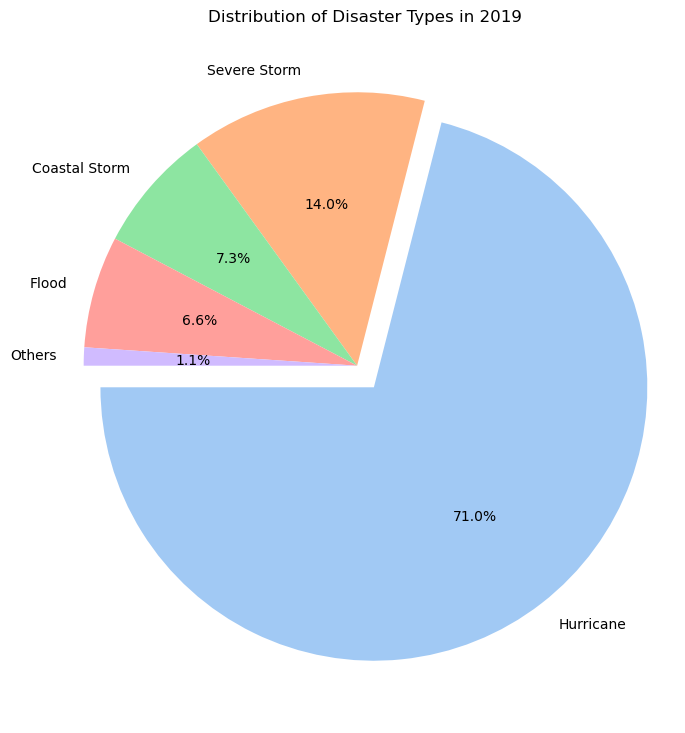

In [37]:
# Filter the data for the year 2019
data_2019 =df_cleaned[results_df['fiscal_year_declared'] == 2019]

# Calculate the count of each disaster type in 2019
disaster_counts_2019 = data_2019['incident_type'].value_counts()

# Calculate the percentage for each disaster category in 2019
total_disasters_2019 = disaster_counts_2019.sum()
percentages_2019 = (disaster_counts_2019 / total_disasters_2019) * 100

# Get the categories with percentage 1% or below in 2019
others_categories_2019 = percentages_2019[percentages_2019 <= 1]

# Calculate the total count for the "Others" category in 2019
others_count_2019 = others_categories_2019.sum()

# Filter out the categories with percentage above 1% in 2019
top_categories_2019 = percentages_2019[percentages_2019 > 1]

# Add the "Others" category with its count to the filtered counts
others_series = pd.Series({'Others': others_count_2019})
disasters_to_display = pd.concat([top_categories_2019, others_series])

# Define the explode values for the pie chart (you can adjust these values as needed)
explode = (0.1, 0, 0, 0, 0)

# Create the pie chart with "Others" grouping for the year 2019
plt.figure(figsize=(8, 9))
plt.pie(disasters_to_display, explode=explode, labels=disasters_to_display.index, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('pastel'))
plt.title('Distribution of Disaster Types in 2019')
plt.axis('equal')
plt.show()

/var/folders/t1/18wjd24j1v3bs98g33bz6yh40000gn/T/ipykernel_33102/2362879074.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_2020 = df_cleaned[results_df['fiscal_year_declared'] == 2020]


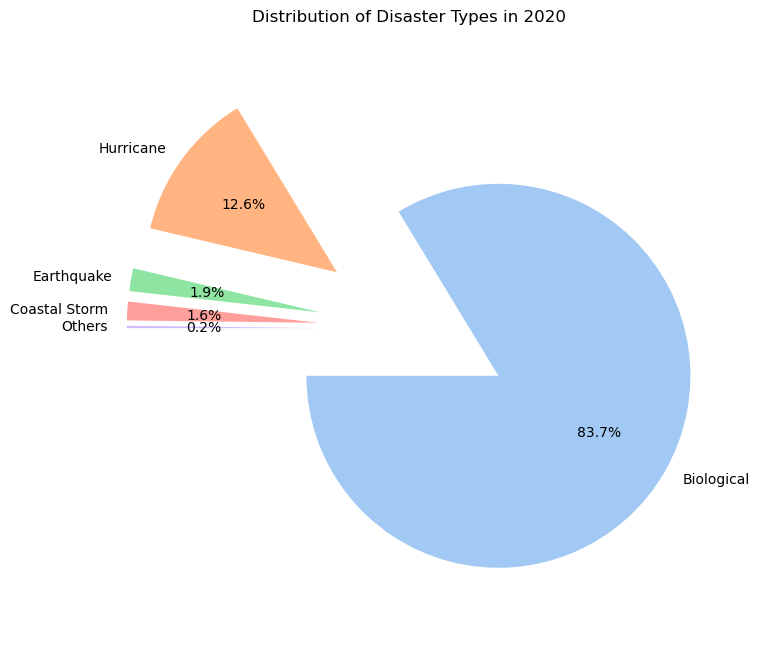

In [38]:
# Filter the data for the year 2020
data_2020 = df_cleaned[results_df['fiscal_year_declared'] == 2020]

# Calculate the count of each disaster type in 2020
disaster_counts_2020 = data_2020['incident_type'].value_counts()

# Calculate the percentage for each disaster category
total_disasters_2020 = disaster_counts_2020.sum()
percentages_2020 = (disaster_counts_2020 / total_disasters_2020) * 100

# Get the categories with percentage 1% or below
others_categories_2020 = percentages_2020[percentages_2020 <= 1]

# Calculate the total count for the "Others" category
others_count_2020 = others_categories_2020.sum()

# Filter out the categories with percentage above 1%
top_categories_2020 = percentages_2020[percentages_2020 > 1]

# Add the "Others" category with its count to the filtered counts
others_series = pd.Series({'Others': others_count_2020})
disasters_to_display_2020 = pd.concat([top_categories_2020, others_series])

# Define the explode values for the pie chart (you can adjust these values as needed)
explode = [0.5] * len(disasters_to_display_2020)

# Create the pie chart with "Others" grouping for the year 2020
plt.figure(figsize=(8, 8))
plt.pie(disasters_to_display_2020, explode=explode, labels=disasters_to_display_2020.index, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('pastel'))
plt.title('Distribution of Disaster Types in 2020')
plt.axis('equal')
plt.show()

/var/folders/t1/18wjd24j1v3bs98g33bz6yh40000gn/T/ipykernel_33102/1703807852.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_2020_texas = df_cleaned[(results_df['fiscal_year_declared'] == 2020) & (results_df['state'] == 'TX')]


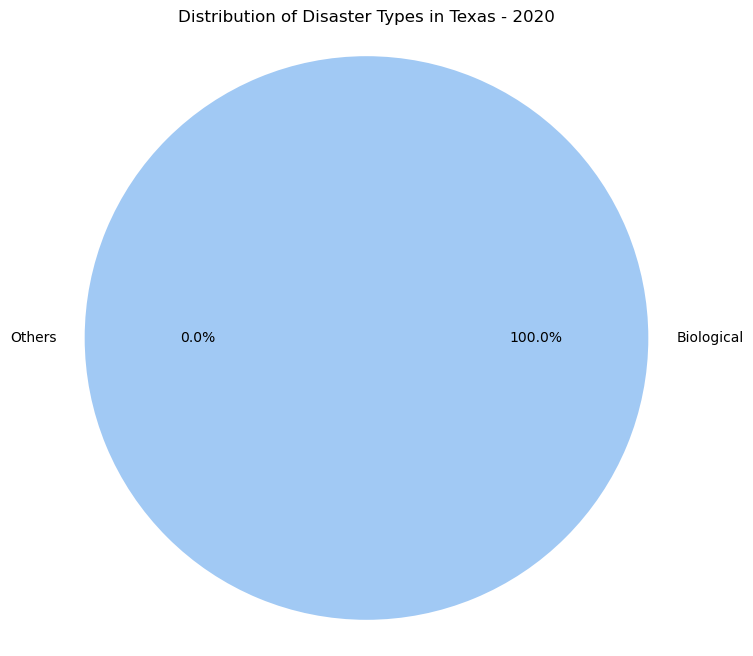

In [39]:
# Filter the data for the year 2020 and the state of Texas
data_2020_texas = df_cleaned[(results_df['fiscal_year_declared'] == 2020) & (results_df['state'] == 'TX')]

# Calculate the count of each disaster type in 2020 for Texas
disaster_counts_2020_texas = data_2020_texas['incident_type'].value_counts()

# Calculate the percentage for each disaster category in 2020 for Texas
total_disasters_2020_texas = disaster_counts_2020_texas.sum()
percentages_2020_texas = (disaster_counts_2020_texas / total_disasters_2020_texas) * 100

# Get the categories with percentage 1% or below in 2020 for Texas
others_categories_2020_texas = percentages_2020_texas[percentages_2020_texas <= 1]

# Calculate the total count for the "Others" category in 2020 for Texas
others_count_2020_texas = others_categories_2020_texas.sum()

# Filter out the categories with percentage above 1% in 2020 for Texas
top_categories_2020_texas = percentages_2020_texas[percentages_2020_texas > 1]

# Add the "Others" category with its count to the filtered counts
others_series = pd.Series({'Others': others_count_2020_texas})
disasters_to_display_2020_texas = pd.concat([top_categories_2020_texas, others_series])

# Define the explode values for the pie chart (you can adjust these values as needed)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Create the pie chart with "Others" grouping for the year 2020 for Texas
plt.figure(figsize=(8, 8))
plt.pie(disasters_to_display_2020_texas, labels=disasters_to_display_2020_texas.index, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('pastel'))
plt.title('Distribution of Disaster Types in Texas - 2020')
plt.axis('equal')
plt.show()

/var/folders/t1/18wjd24j1v3bs98g33bz6yh40000gn/T/ipykernel_33102/3266499884.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_2021 = df_cleaned[results_df['fiscal_year_declared'] == 2021]


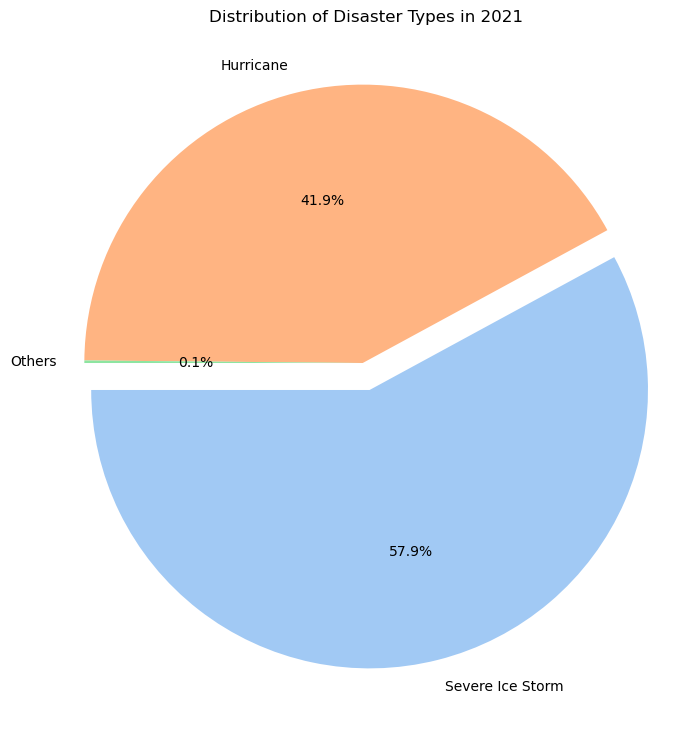

In [40]:
# Filter the data for the year 2021
data_2021 = df_cleaned[results_df['fiscal_year_declared'] == 2021]

# Calculate the count of each disaster type in 2021
disaster_counts_2021 = data_2021['incident_type'].value_counts()

# Calculate the percentage for each disaster category in 2021
total_disasters_2021 = disaster_counts_2021.sum()
percentages_2021 = (disaster_counts_2021 / total_disasters_2021) * 100

# Get the categories with percentage 1% or below in 2021
others_categories_2021 = percentages_2021[percentages_2021 <= 1]

# Calculate the total count for the "Others" category in 2021
others_count_2021 = others_categories_2021.sum()

# Filter out the categories with percentage above 1% in 2021
top_categories_2021 = percentages_2021[percentages_2021 > 1]

# Add the "Others" category with its count to the filtered counts
others_series = pd.Series({'Others': others_count_2021})
disasters_to_display_2021 = pd.concat([top_categories_2021, others_series])

# Define the explode values for the pie chart (you can adjust these values as needed)
explode = (0.1, 0, 0)

# Create the pie chart with "Others" grouping for the year 2021
plt.figure(figsize=(8, 9))
plt.pie(disasters_to_display_2021, explode=explode, labels=disasters_to_display_2021.index, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('pastel'))
plt.title('Distribution of Disaster Types in 2021')
plt.axis('equal')
plt.show()

/var/folders/t1/18wjd24j1v3bs98g33bz6yh40000gn/T/ipykernel_33102/4190479730.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_2021_texas = df_cleaned[(results_df['fiscal_year_declared'] == 2021) & (results_df['state'] == 'TX')]


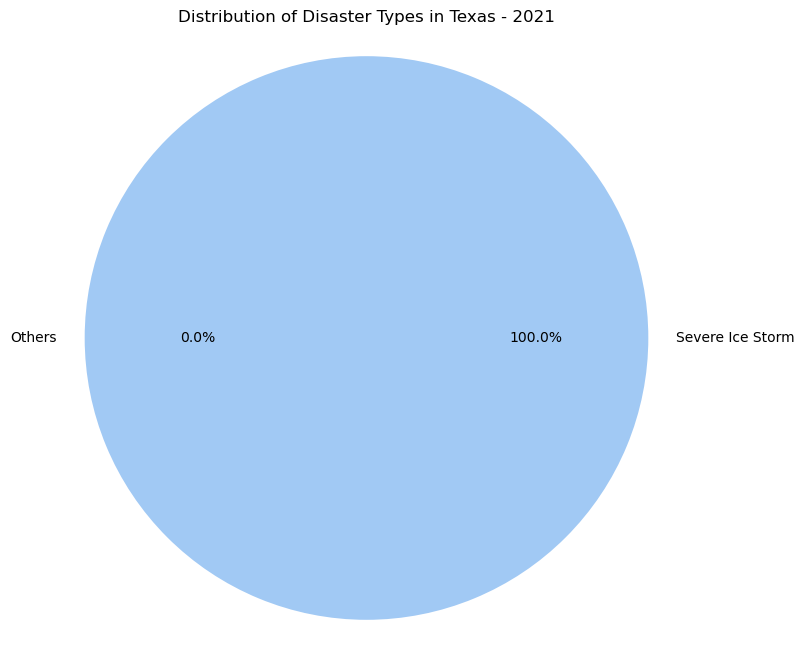

In [41]:
# Filter the data for the year 2021 and the state of Texas
data_2021_texas = df_cleaned[(results_df['fiscal_year_declared'] == 2021) & (results_df['state'] == 'TX')]

# Calculate the count of each disaster type in 2021 for Texas
disaster_counts_2021_texas = data_2021_texas['incident_type'].value_counts()

# Calculate the percentage for each disaster category in 2021 for Texas
total_disasters_2021_texas = disaster_counts_2021_texas.sum()
percentages_2021_texas = (disaster_counts_2021_texas / total_disasters_2021_texas) * 100

# Get the categories with percentage 1% or below in 2021 for Texas
others_categories_2021_texas = percentages_2021_texas[percentages_2021_texas <= 1]

# Calculate the total count for the "Others" category in 2021 for Texas
others_count_2021_texas = others_categories_2021_texas.sum()

# Filter out the categories with percentage above 1% in 2021 for Texas
top_categories_2021_texas = percentages_2021_texas[percentages_2021_texas > 1]

# Add the "Others" category with its count to the filtered counts
others_series = pd.Series({'Others': others_count_2021_texas})
disasters_to_display_2021_texas = pd.concat([top_categories_2021_texas, others_series])

# Define the explode values for the pie chart (you can adjust these values as needed)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Create the pie chart with "Others" grouping for the year 2021 for Texas
plt.figure(figsize=(8, 8))
plt.pie(disasters_to_display_2021_texas, labels=disasters_to_display_2021_texas.index, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('pastel'))
plt.title('Distribution of Disaster Types in Texas - 2021')
plt.axis('equal')
plt.show()

/var/folders/t1/18wjd24j1v3bs98g33bz6yh40000gn/T/ipykernel_33102/60759909.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_2022 = df_cleaned[results_df['fiscal_year_declared'] == 2022]


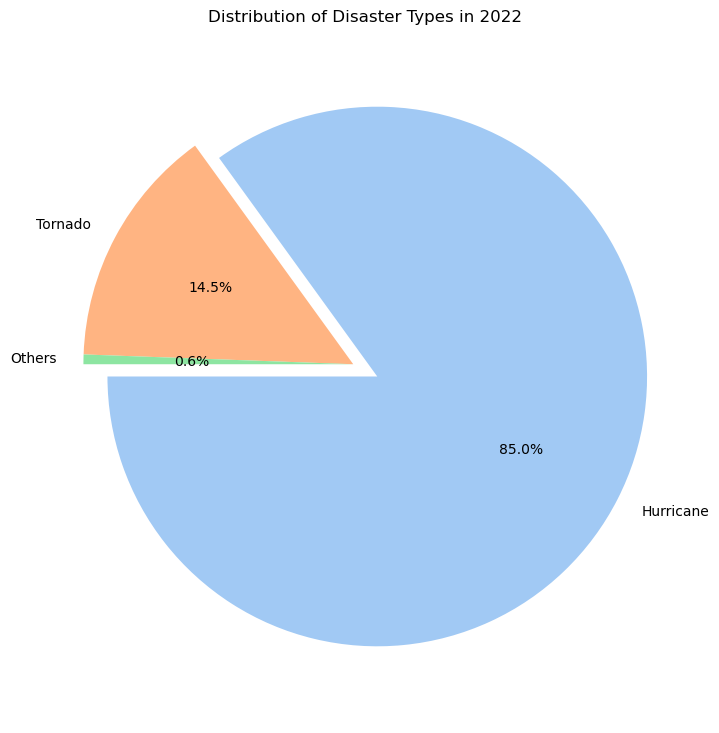

In [42]:
# Filter the data for the year 2022
data_2022 = df_cleaned[results_df['fiscal_year_declared'] == 2022]

# Calculate the count of each disaster type in 2022
disaster_counts_2022 = data_2022['incident_type'].value_counts()

# Calculate the percentage for each disaster category in 2022
total_disasters_2022 = disaster_counts_2022.sum()
percentages_2022 = (disaster_counts_2022 / total_disasters_2022) * 100

# Get the categories with percentage 1% or below in 2022
others_categories_2022 = percentages_2022[percentages_2022 <= 1]

# Calculate the total count for the "Others" category in 2022
others_count_2022 = others_categories_2022.sum()

# Filter out the categories with percentage above 1% in 2022
top_categories_2022 = percentages_2022[percentages_2022 > 1]

# Add the "Others" category with its count to the filtered counts
others_series = pd.Series({'Others': others_count_2022})
disasters_to_display_2022 = pd.concat([top_categories_2022, others_series])

# Define the explode values for the pie chart (you can adjust these values as needed)
explode = (0.1, 0, 0)

# Create the pie chart with "Others" grouping for the year 2022
plt.figure(figsize=(8, 9))
plt.pie(disasters_to_display_2022, explode=explode, labels=disasters_to_display_2022.index, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('pastel'))
plt.title('Distribution of Disaster Types in 2022')
plt.axis('equal')
plt.show()

In [43]:
states_max_risk = df_cleaned[['state','incident_type']].groupby('state').count()
states_max_risk.reset_index(inplace=True)
states_max_risk=df_cleaned.sort_values(by='incident_type',ascending=False).head(10)
states_max_risk.head()

,fema_declaration_string,disaster_number,state,declaration_type,declaration_date,fiscal_year_declared,incident_type,declaration_title,ih_program_declared,ia_program_declared,...,fips,place_code,designated_area,declaration_request_number,last_ia_filing_date,last_refresh,hash,id,Financial Response Time (months),Incident Begin/End (days)
7331,DR-623-WA,623,WA,DR,1980-05-21 00:00:00+00:00,1980,Volcanic Eruption,"Volcanic Eruption, Mt. St. Helens",0,1,...,53045,99045,Mason (County),80038,NaT,2023-03-18T13:22:03Z,46e9ac6afa77ec32eb1e1e55293f0d1d1c0e1c96,8ccb4e75-7051-4115-ac21-af87281c7ada,213,0.0
7343,DR-623-WA,623,WA,DR,1980-05-21 00:00:00+00:00,1980,Volcanic Eruption,"Volcanic Eruption, Mt. St. Helens",0,1,...,53069,99069,Wahkiakum (County),80038,NaT,2023-03-18T13:22:03Z,1f1be754326c09781eb069a2ec627731c5ed7215,fe3fcc92-9da8-45bf-8d92-ee2a0004c3d1,213,0.0
7346,DR-623-WA,623,WA,DR,1980-05-21 00:00:00+00:00,1980,Volcanic Eruption,"Volcanic Eruption, Mt. St. Helens",0,1,...,53075,99075,Whitman (County),80038,NaT,2023-03-18T13:22:03Z,307b9a203629a2785ddfc19ebe2440a399d0129e,24756b9d-36a9-4e98-92bf-3dc44fd78e79,213,0.0
7347,DR-623-WA,623,WA,DR,1980-05-21 00:00:00+00:00,1980,Volcanic Eruption,"Volcanic Eruption, Mt. St. Helens",0,1,...,53077,99077,Yakima (County),80038,NaT,2023-03-18T13:22:03Z,3a86bde5bd8c833612e749172e45ff89884c3762,2e4435b1-a2bc-419f-b284-90d0026b6070,213,0.0
7344,DR-623-WA,623,WA,DR,1980-05-21 00:00:00+00:00,1980,Volcanic Eruption,"Volcanic Eruption, Mt. St. Helens",0,1,...,53071,99071,Walla Walla (County),80038,NaT,2023-03-18T13:22:03Z,a93513a75731ff9a60419a5997ea733c3ec6bd44,b6553763-ea0e-49f3-926b-81be5644af48,213,0.0


## Most common natural disasters in TX

In [44]:
# Assuming data_df is your original DataFrame
states_max_risk = df_cleaned[df_cleaned['state'] == 'TX']
most_common_disaster = states_max_risk['incident_type'].value_counts().idxmax()

print("The most common natural disaster in Texas is:", most_common_disaster)

The most common natural disaster in Texas is: Fire


In [45]:
# Assuming data_df is your original DataFrame
tx_risk = df_cleaned[df_cleaned['state'] == 'TX']

# Filter for hurricanes in Texas
hurricanes_count = tx_risk[tx_risk['incident_type'] == 'Fire'].shape[0]

print("Number of hurricanes reported in Texas:", hurricanes_count)

Number of hurricanes reported in Texas: 1213


In [46]:
# Assuming data_df is your original DataFrame
tx_risk = df_cleaned[df_cleaned['state'] == 'TX']

# Find the count of each type of natural disaster in Texas
disasters_count_in_tx = tx_risk['incident_type'].value_counts()

print(disasters_count_in_tx)

Fire                1213
Hurricane           1052
Severe Storm         569
Flood                330
Severe Ice Storm     300
Biological           257
Drought              149
Other                 55
Coastal Storm         42
Tornado               41
Freezing              16
Name: incident_type, dtype: int64


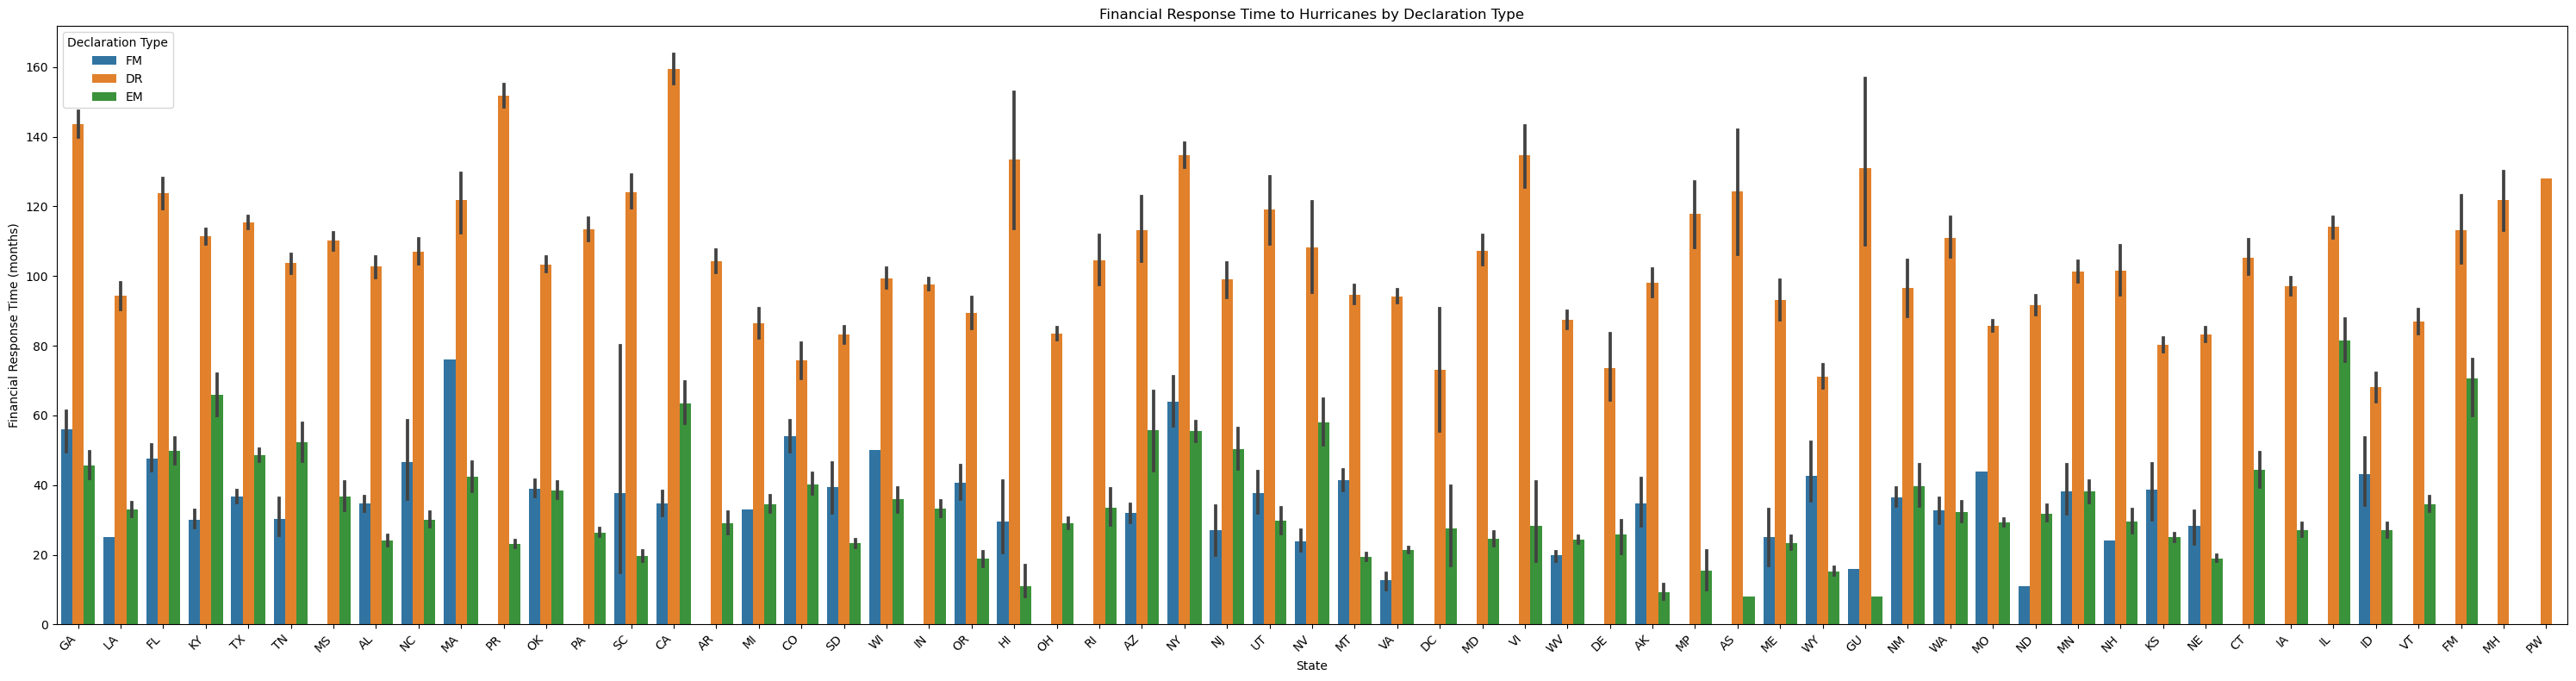

In [47]:
plt.figure(figsize=(30, 8))

# Set the order of hue levels (declaration types) for consistent color-coding in the legend
hue_order = ['FM', 'DR', 'EM']

sns.barplot(
    data=df_cleaned,
    x='state',
    y='Financial Response Time (months)',
    hue='declaration_type',
    hue_order=hue_order  # Specify the order of declaration types
)

plt.title('Financial Response Time to Hurricanes by Declaration Type')
plt.xlabel('State')
plt.ylabel('Financial Response Time (months)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Since we are using the 'hue' parameter, seaborn will automatically create the legend with color-coding.
plt.legend(title='Declaration Type')

plt.show()

In [48]:
# Create new column that adds up all the program declarations together
df_cleaned['severity_score'] = df_cleaned['ih_program_declared'] + df_cleaned['ia_program_declared'] + \
                               df_cleaned['pa_program_declared'] + df_cleaned['hm_program_declared'] 

# Find the index of the row with the highest severity score
max_severity_index = df_cleaned['severity_score'].idxmax()

# Extract the row with the highest severity score
highest_severity_row = df_cleaned.loc[max_severity_index]

highest_severity_row

fema_declaration_string                                           DR-1494-DE
disaster_number                                                         1494
state                                                                     DE
declaration_type                                                          DR
declaration_date                                   2003-09-20 00:00:00+00:00
fiscal_year_declared                                                    2003
incident_type                                                      Hurricane
declaration_title                                           Hurricane Isabel
ih_program_declared                                                        1
ia_program_declared                                                        1
pa_program_declared                                                        1
hm_program_declared                                                        1
incident_begin_date                                2003-09-18 00:00:00+00:00

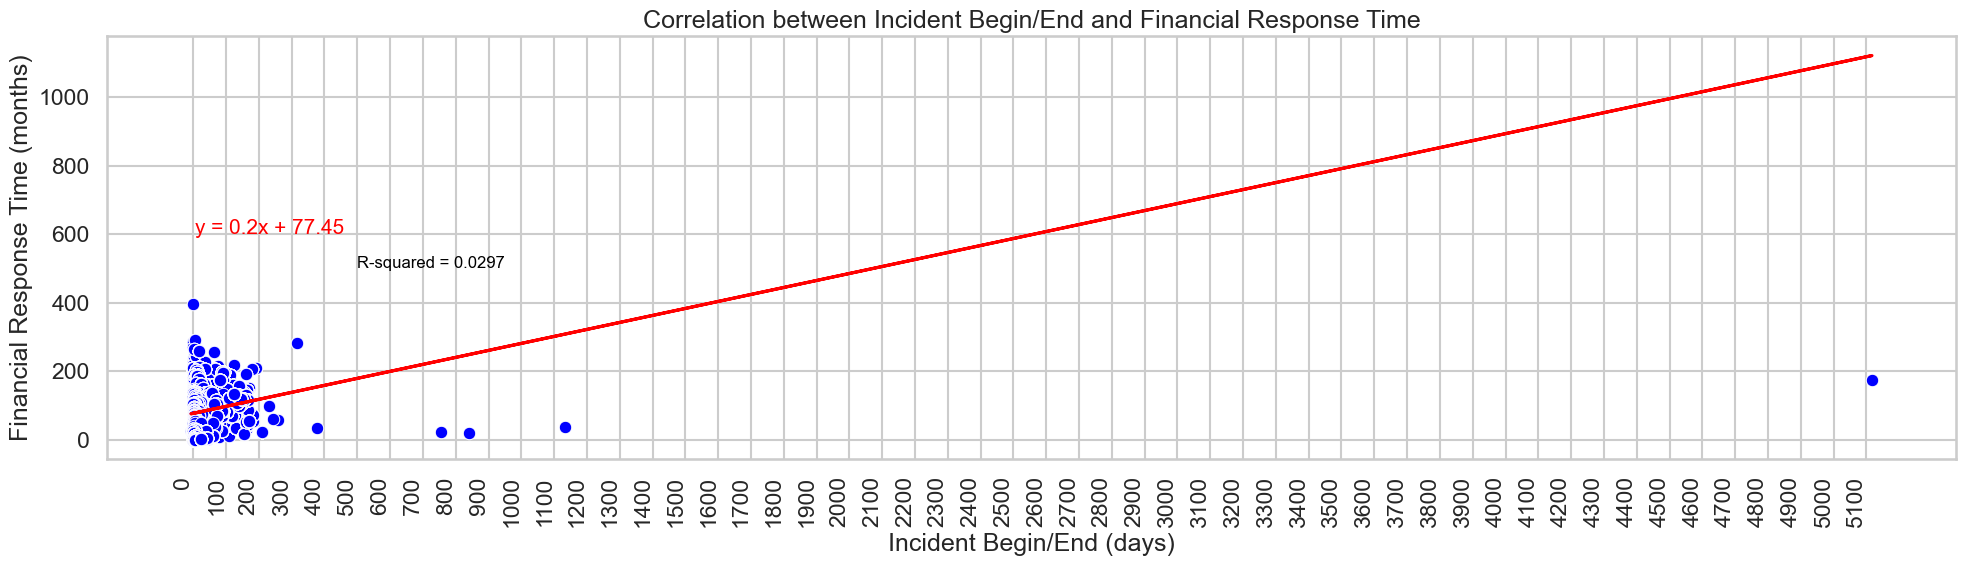

In [49]:
# Drop rows with non-finite values in 'Incident Begin/End (days)' column
converted_data_df = converted_data_df.dropna(subset=['Incident Begin/End (days)'])

# Convert the 'Incident Begin/End (days)' column to integers
converted_data_df['Incident Begin/End (days)'] = converted_data_df['Incident Begin/End (days)'].astype(int)

# Set the Seaborn style and context for a better-looking grid
sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize=(20, 6))
sns.scatterplot(data=converted_data_df, x='Incident Begin/End (days)', y='Financial Response Time (months)', color='blue')
plt.title('Correlation between Incident Begin/End and Financial Response Time')
plt.xlabel('Incident Begin/End (days)')
plt.ylabel('Financial Response Time (months)')

# Set the x-axis tick marks to be in increments of 2000
plt.xticks(range(0, converted_data_df['Incident Begin/End (days)'].max() + 1, 100))

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=90, ha='right')

# Calculate the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(converted_data_df['Incident Begin/End (days)'], converted_data_df['Financial Response Time (months)'])
regress_values = converted_data_df['Incident Begin/End (days)'] * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(converted_data_df['Incident Begin/End (days)'], regress_values, "r-")
plt.annotate(line_eq, (5, 600), fontsize=15, color="red")

# Calculate and print the r-squared value
r_squared = rvalue**2
plt.text(500, 500, f"R-squared = {r_squared:.4f}", fontsize=12, color='black')


plt.tight_layout()
plt.show()

## linear regression model using Incident Begin/End as the predictor does not fit the data well, and the relationship between Incident Begin/End and Financial Response Time is weak.

## Since the coefficient of the Incident Begin/End (0.01) is positive, it indicates that there is a positive correlation between the Incident Begin/End and the Financial Response Time. In other words, as the Incident Begin/End time increases, the Financial Response Time also tends to increase.